In [159]:
import pandas as pd

In [160]:
df = pd.read_csv("titanic.csv")

In [161]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
mean = df["Age"].mean()
mean = round(mean)
mean
df['Age'].fillna(mean, inplace=True)

In [164]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [165]:
mapping = {"male":0,"female":1}
df['Sex'] = df['Sex'].map(mapping)

In [166]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [167]:
embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked, inplace=True)

In [168]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [169]:
mapping = {"S":0,"C":1,"Q":2}
df['Embarked'] = df['Embarked'].map(mapping)

In [170]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.758889,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [171]:
dropping = ["PassengerId","Ticket","Cabin","Name","Embarked","SibSp","Parch"]
df = df.drop(dropping,axis=1)

In [172]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
888,0,3,1,30.0,23.4500
889,1,1,0,26.0,30.0000


In [173]:
import matplotlib.pyplot as plt

In [174]:
import seaborn as sns

In [175]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,0.543351,-0.070657,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.329727,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084660,0.182333
Age,-0.070657,-0.329727,-0.084660,1.000000,0.090632
Fare,0.257307,-0.549500,0.182333,0.090632,1.000000


<Axes: >

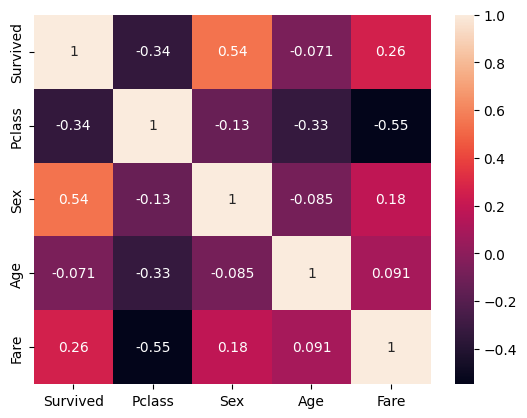

In [176]:
sns.heatmap(corr,annot = True)

In [177]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=3)

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [181]:
knn = KNeighborsClassifier()
svm = SVC()
gb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [182]:
model = rf.fit(X_train,y_train)
print("accuracy of random forest: ",rf.score(X_test,y_test))
y_pred=rf.predict(X_test)
y_true=y_test

accuracy of random forest:  0.7802690582959642


In [183]:
knn.fit(X_train, y_train)
print("accuracy of knn: ",knn.score(X_test,y_test))
y_pred=knn.predict(X_test)
y_true=y_test

accuracy of knn:  0.6816143497757847


In [184]:
svm.fit(X_train, y_train)
print("accuracy of svm: ",svm.score(X_test,y_test))
y_pred=svm.predict(X_test)
y_true=y_test

accuracy of svm:  0.6233183856502242


In [185]:
gb.fit(X_train, y_train)
print("accuracy of gb: ",gb.score(X_test,y_test))
y_pred=gb.predict(X_test)
y_true=y_test

accuracy of gb:  0.7623318385650224


In [186]:
dt.fit(X_train, y_train)
print("accuracy of decision tree: ",dt.score(X_test,y_test))
y_pred=dt.predict(X_test)
y_true=y_test

accuracy of decision tree:  0.7623318385650224


In [187]:
def predict(Pclass,Sex,Age,Fare):
    features = np.array(([Pclass,Sex,Age,Fare]))
    reshaped = features.reshape(1,-1)
    pred = rf.predict(reshaped)
    return  pred[0]

In [188]:
Pclass = 2
Sex = 1
Age = 36
Fare = 7

prediction = predict(Pclass,Sex,Age,Fare)

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [189]:
prediction

1

In [190]:
import joblib
import numpy as np
joblib.dump(model,'model_saved')

['model_saved']

In [191]:
load_model=joblib.load("model_saved")
load_model

RandomForestClassifier()

In [192]:
print(model)

RandomForestClassifier()


In [193]:
new_data = np.array([[2, 1, 36, 7]])
predictions = load_model.predict(new_data)

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [194]:
predictions

array([1], dtype=int64)